In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

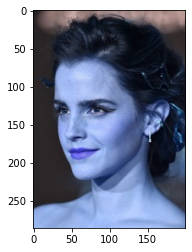

In [2]:
img = cv2.imread('./dataset/test_images/emma_watson.jpg')
plt.imshow(img)

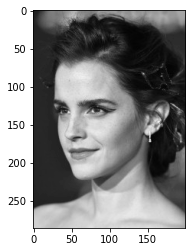

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

In [4]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[  6,  90, 108, 108]])

In [5]:
(x,y,w,h) = faces[0]
(x,y,w,h)

(6, 90, 108, 108)

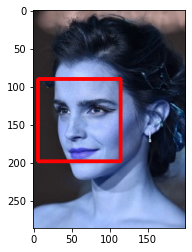

In [6]:
face_rectangle = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_rectangle)

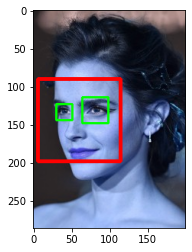

In [7]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

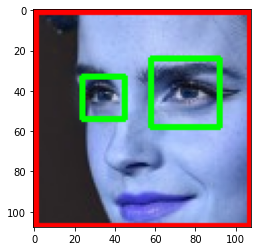

In [8]:
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes_detected(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        if len(eyes) >=2:
            return roi_color
    

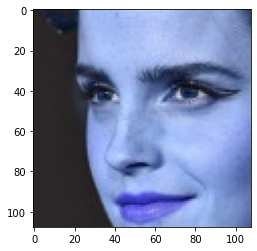

In [16]:
cropped_image = get_cropped_image_if_2_eyes_detected('./dataset/test_images/emma_watson.jpg')
plt.imshow(cropped_image)